# Predict Insurance Charges
## Final Project for DTSA 5509

Github - https://github.com/vibhu-shakelli/predict-insurance-charges

### Problem Description
Health insurance products are extremely complex, and require insurance companies to accurately assess risk to determine premiums. This industry has become of particular interest to me, as I have just begun a new job at a supplemental insurance company. With this project I hope to create a model that is able to predict the charges an insurance company can expect to see for a given policyholder.

The data source I have chosen for this project is from *Machine Learning* with R by Brett Lantz. The file itself is readily available on [Github](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv). The data file contains 1338 policyholders. I will be using the following 6 features as predictors: 
1. age - numeric - age of the policyholder
1. sex - categorical (binary) - biological sex of the policyholider
1. bmi - numeric - body mass index of the policy holder
1. children - numeric - number of children
1. smoker - categorical (binary) - whether or not the policyholder smokes
1. region - categorical - region of the United States that the policyholder resides in

My model will use the linear regression to predict the "charges". 

Source Citation: 
Lantz, B. (2019). Machine learning with R. Packt. 

### Set Up
I am importing some packages and the data. 

In [1]:
# the packages I am actually using. 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm


In [2]:
#switch this to this ddataset https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records
%matplotlib inline
import scipy as sp
import scipy.stats as stats
import pandas as pd


In [3]:
# importing all the required libraries

from math import exp
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
%matplotlib inline

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [4]:
df = pd.read_csv("insurance.csv") 

### Exploratory Data Analysis (EDA)

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Analysis of Individual Features

##### Age
Age is uniformly distribute from 20-59 years old. Below 20 and above 60, we have less records.

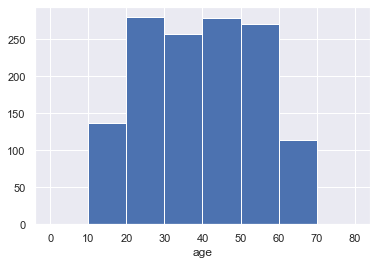

In [7]:
plt.hist(df['age'], bins = [0, 10, 20, 30, 40, 50, 60, 70, 80])
plt.xlabel('age')
plt.show()

##### Sex
Sex is uniformly distribute, with almost equal amounts between "female" and "male".

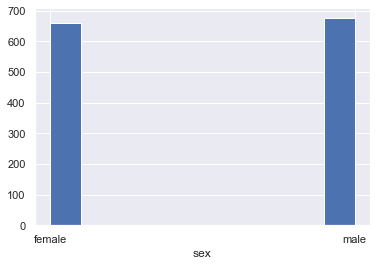

In [8]:
plt.hist(df['sex'])
plt.xlabel('sex')
plt.show()

##### BMI
BMI is uniformly distributed.

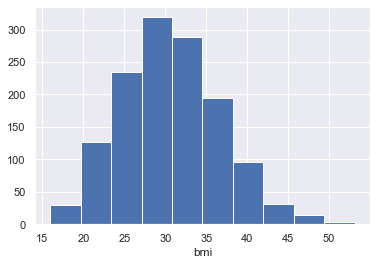

In [9]:
plt.hist(df['bmi'])
plt.xlabel('bmi')
plt.show()

##### Children
Children is a skewed distribution, with the highest frequency at 0 children. 

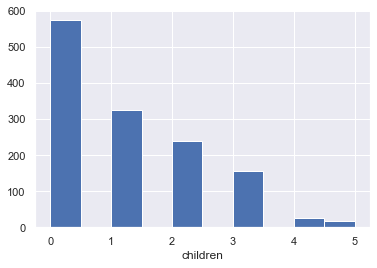

In [10]:
plt.hist(df['children'])
plt.xlabel('children')
plt.show()

##### Smoker
There are significantly more non-smokers than there are smokers. 

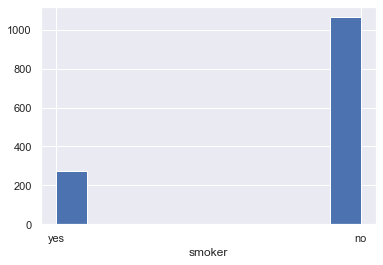

In [11]:
plt.hist(df['smoker'])
plt.xlabel('smoker')
plt.show()

##### Region
The dataset is uniformly distributed through the 4 regions of the United States. 

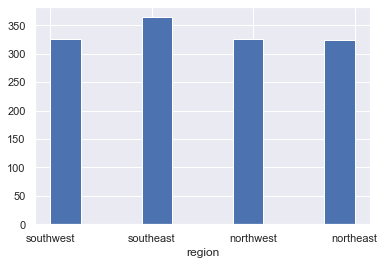

In [12]:
plt.hist(df['region'])
plt.xlabel('region')
plt.show()

##### Charges
Charges has a skewed distribution where most of the policyholders are having less than $10,000 in charges. 

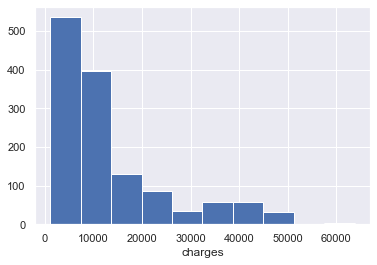

In [13]:
plt.hist(df['charges'])
plt.xlabel('charges')
plt.show()

#### Data Cleaning & One-Hot Encoding
The dataset in its original form does not require cleaning. It is not missing values, and there are no obvious outliers. 

It's important to note that some of the columns present in the dataset are categorical (ie. *sex*, *smoker*, & *region*). To be able to handle these in a linear regression model, I am using one-hot encoding to convert every categorical value to binary variables. For example, the two sexes in the dataset are male and female. After the encoding sex is represented with two variables: *sex_female* and *sex_male*. 

In [14]:
#one hot encoding
df = pd.get_dummies(df, columns = ['sex', 'smoker', 'region'])
df.head(10)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
5,31,25.740,0,3756.62160,1,0,1,0,0,0,1,0
6,46,33.440,1,8240.58960,1,0,1,0,0,0,1,0
7,37,27.740,3,7281.50560,1,0,1,0,0,1,0,0
8,37,29.830,2,6406.41070,0,1,1,0,1,0,0,0
9,60,25.840,0,28923.13692,1,0,1,0,0,1,0,0


#### Correlation Matrix
The predictor with the highest correlation is *smoker_no* and *smoker_yes*. This is unsurprising based on the well researched negative effects smoking can have on one's health. 

<AxesSubplot:>

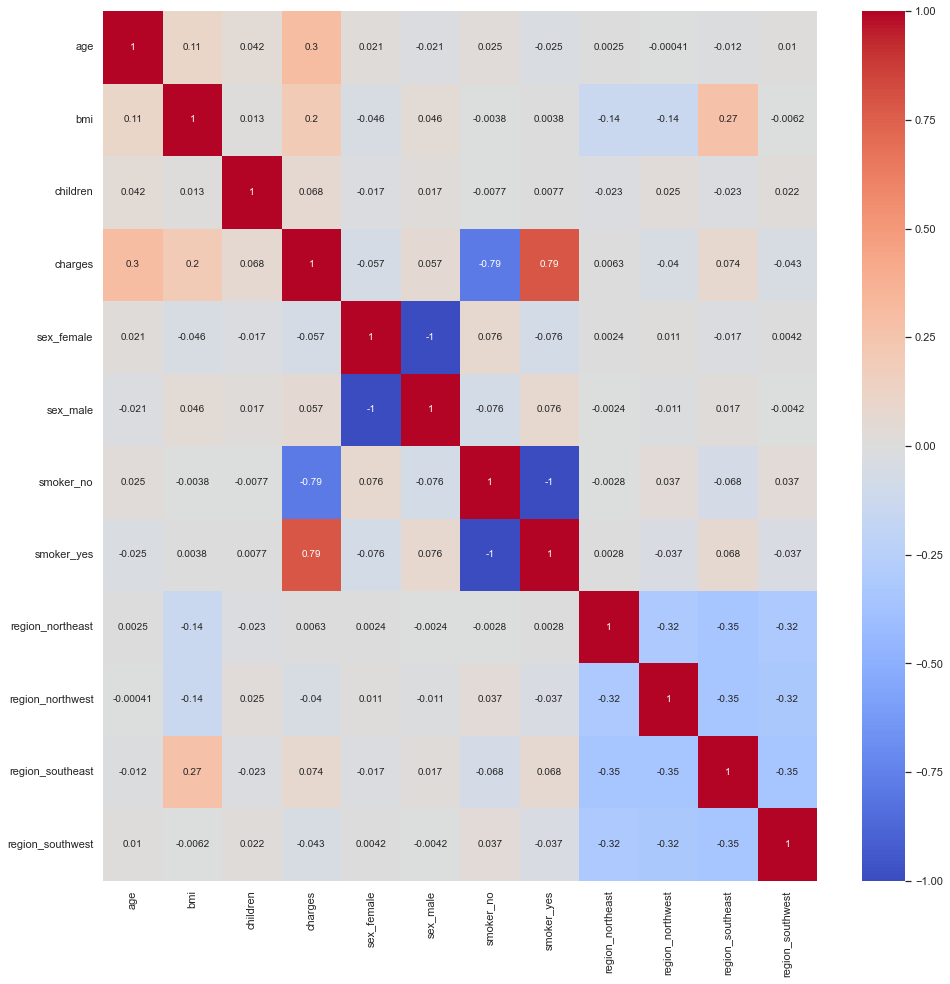

In [15]:
plt.figure(figsize = (16,16))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

#### Pairplot
I noticed a few interesting relationships while inspecting the pair plot. Age seems to have 3 distinct striations in the dataset. But generally speaking, higher age indicates higher charges. 
Of the encoded predictors, smoking shows the most distinct correlation. Smokers tend to have higher chargers, which aligns withe high correlation we noted before. 

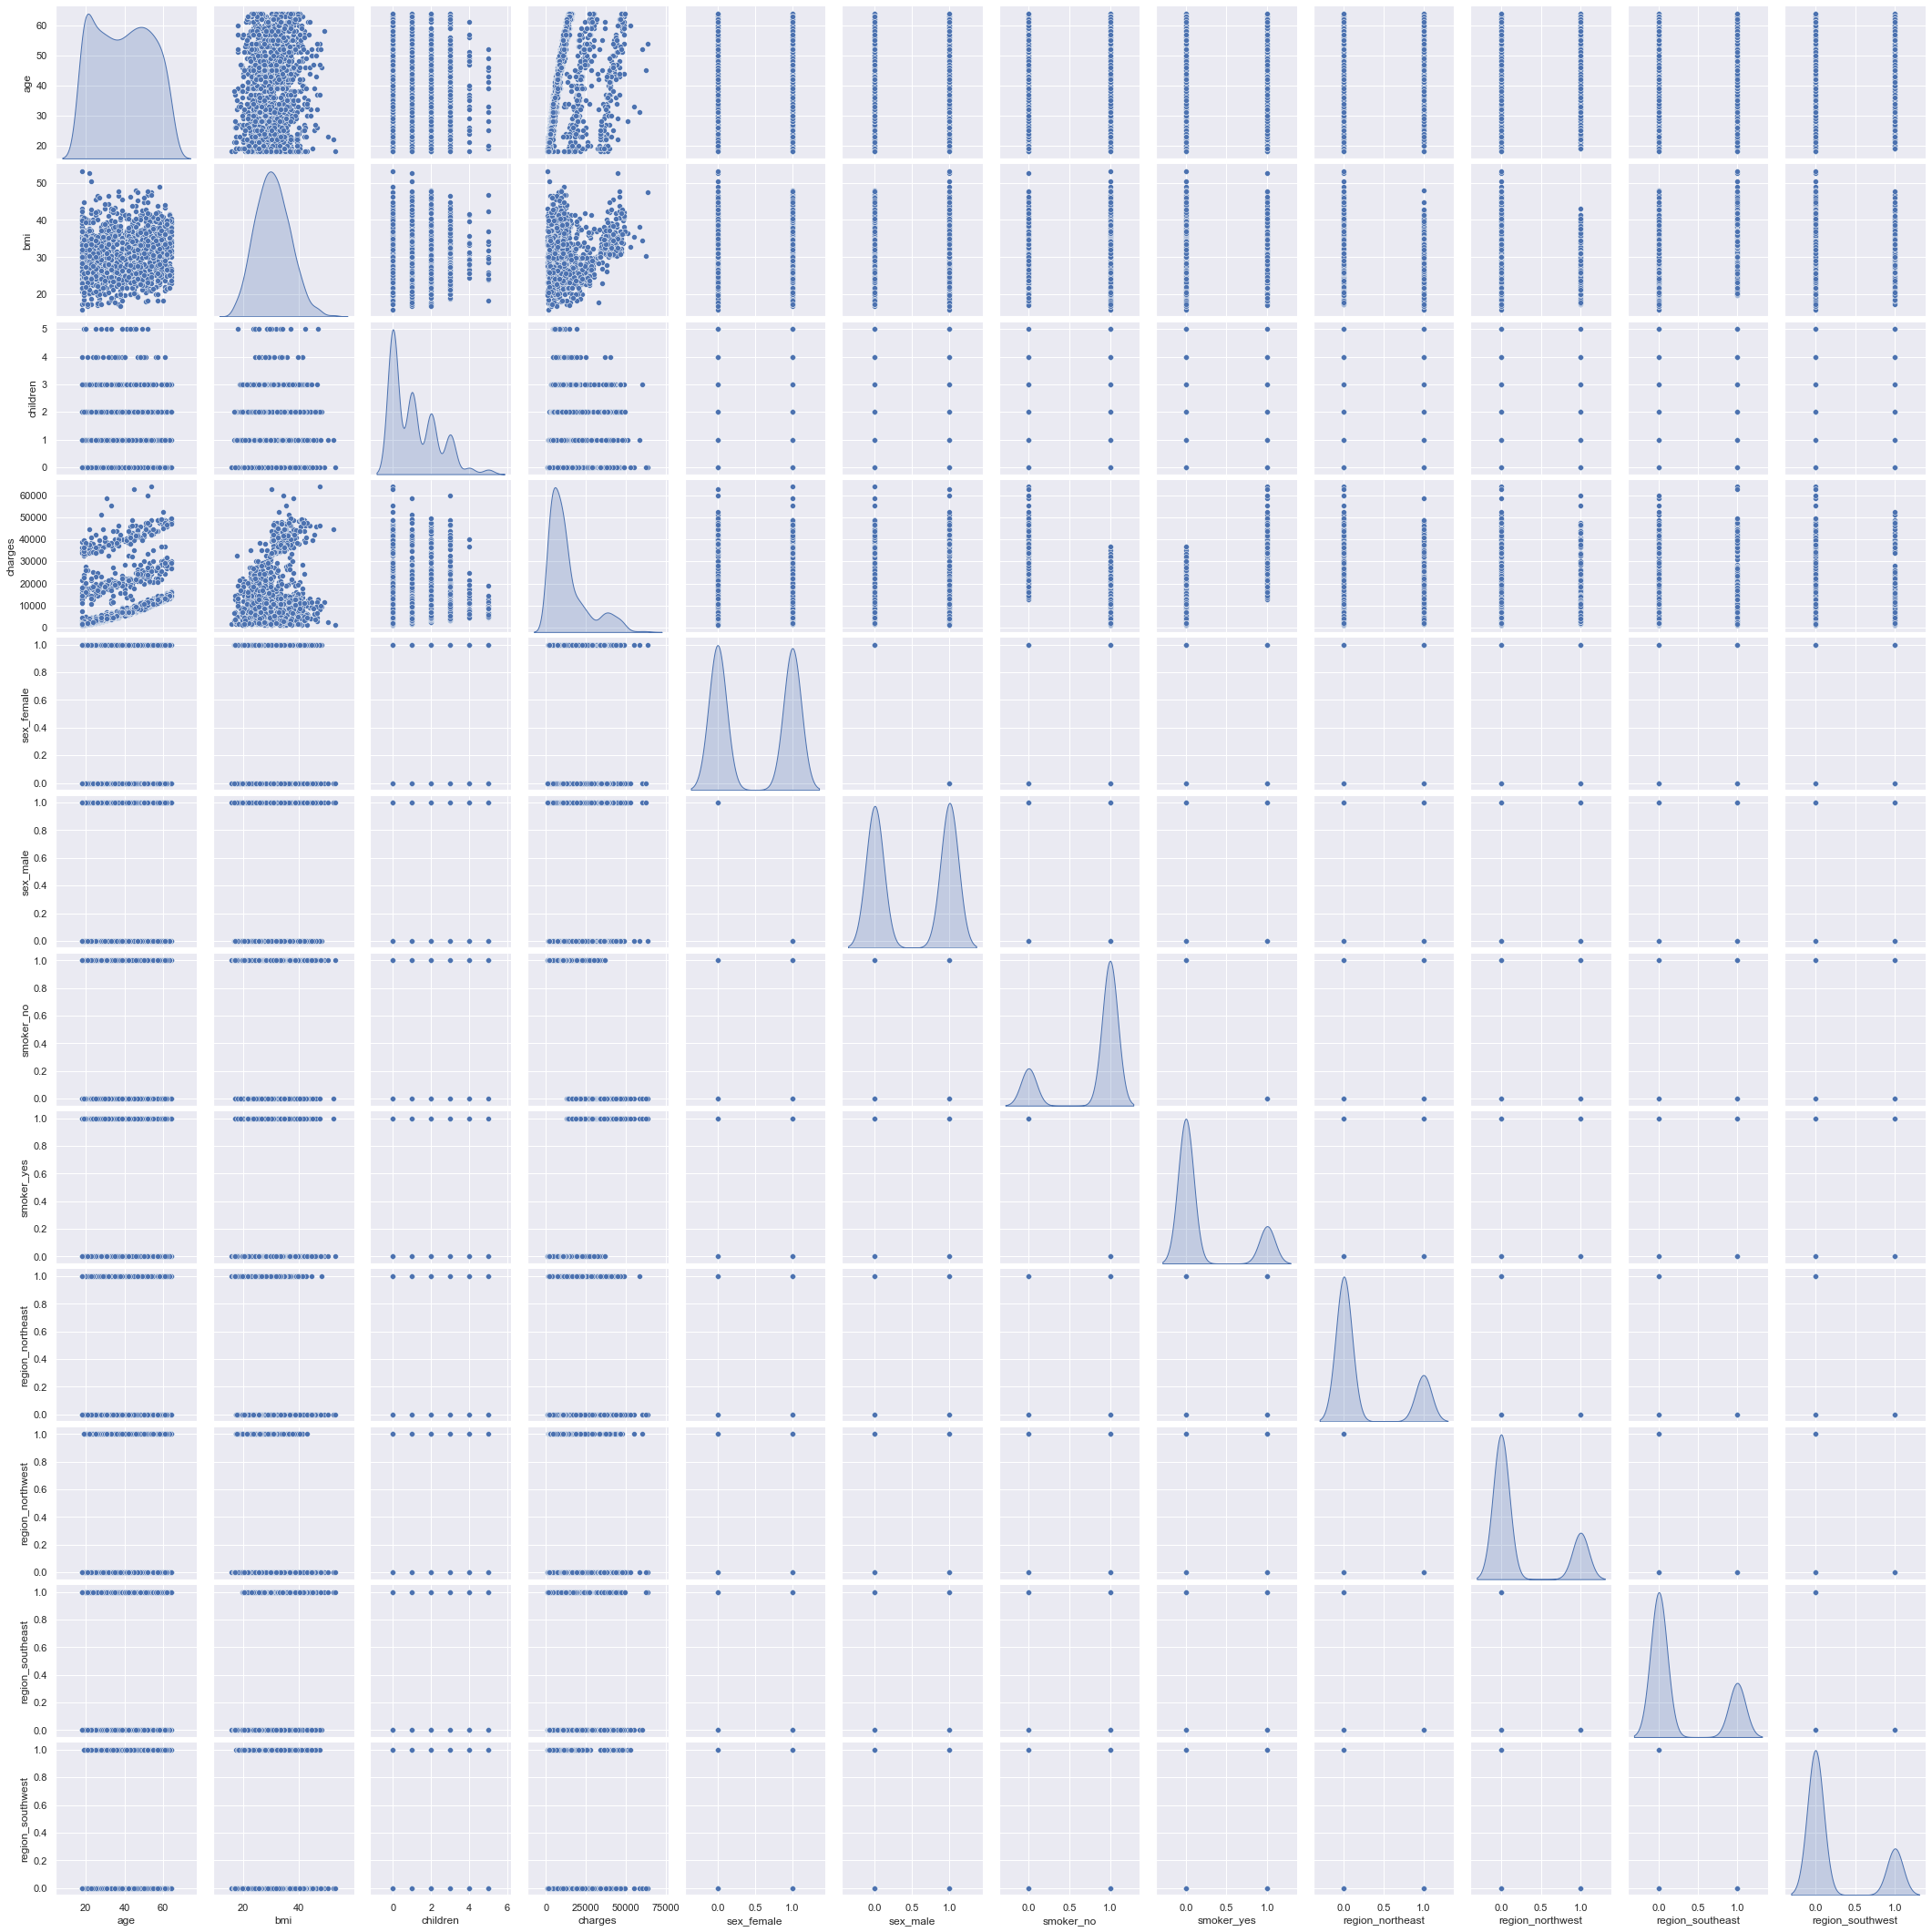

In [16]:
sns.pairplot(data = df, diag_kind='kde')

### Models
#### Training and Test Preparation

In [17]:
X_train, X_test = train_test_split(df,random_state=1, test_size = .20)

print("Length of X_train: ", len(X_train))
print("Length of X_test: ", len(X_test))

results = pd.DataFrame(columns=['model', 'Adj_R_Sq'])

Length of X_train:  1070
Length of X_test:  268


#### Simple Linear Regression Model Using Predictor Based on Correlation Matrix 

In [18]:
simple_model = smf.ols(formula='charges ~ smoker_yes', data=X_train).fit()

adj_R2 = simple_model.rsquared_adj
print("Adjusted R2: " + str(adj_R2))

simple_model.summary()

results = results.append({'model': 'Simple Model', 'Adj_R_Sq': simple_model.rsquared_adj}, ignore_index = True)

Adjusted R2: 0.6205622423453431


#### Best Predictors Based on Simple Models

In [19]:
predictors = pd.DataFrame(columns=['Predictor', 'Adj_R_Sq'])

for predictor in df.columns: 
    model = smf.ols(formula='charges ~ ' + predictor, data=X_train).fit()
    predictors = predictors.append({'Predictor': predictor, 'Adj_R_Sq': model.rsquared_adj}, ignore_index = True)

top_three = predictors.sort_values(by=['Adj_R_Sq'], ascending = False)[1:4]['Predictor'].tolist()
print("Top 3:")
print(top_three)
print(predictors)

Top 3:
['smoker_no', 'smoker_yes', 'age']
           Predictor  Adj_R_Sq
0                age  0.091138
1                bmi  0.033551
2           children  0.000002
3            charges  1.000000
4         sex_female  0.002153
5           sex_male  0.002153
6          smoker_no  0.620562
7         smoker_yes  0.620562
8   region_northeast -0.000935
9   region_northwest -0.000149
10  region_southeast  0.001755
11  region_southwest -0.000253


#### Polynomial Regression with "smoker"
It's important to note here that I used the _age_ predictor instead of _smoker_. Because of the encoding, using the _smoker_ predictor will result in the same R squared regardless of the value of n. 

In [20]:
degrees = pd.DataFrame(columns=['n', 'R_Sq'])

for degree in range(1, 11):
    if degree == 1: 
        formula = 'charges ~ smoker_no'
    else: 
        formula = 'charges ~ smoker_no + ' + ' + '.join([f'np.power(smoker_no, {n})' for n in range(2, degree + 1)])
    poly_model = smf.ols(formula=formula, data=X_train).fit()
    degrees = degrees.append({'n': degree, 'R_Sq': poly_model.rsquared}, ignore_index = True)

print(degrees.sort_values(by=['R_Sq'], ascending = False))

results = results.append({'model': 'Polynomial Model with Smoker', 'Adj_R_Sq': poly_model.rsquared_adj}, ignore_index = True)

      n      R_Sq
2   3.0  0.620917
4   5.0  0.620917
5   6.0  0.620917
0   1.0  0.620917
1   2.0  0.620917
3   4.0  0.620917
8   9.0  0.620841
6   7.0  0.620832
7   8.0  0.620659
9  10.0  0.620517


#### Polynomial Regression with "age"

In [21]:
degrees = pd.DataFrame(columns=['n', 'R_Sq'])
best_r2 = 0
for degree in range(1, 21):
    if degree == 1: 
        formula = 'charges ~ age'
    else: 
        formula = 'charges ~ age + ' + ' + '.join([f'np.power(age, {n})' for n in range(2, degree + 1)])
    poly_model = smf.ols(formula=formula, data=X_train).fit()
    degrees = degrees.append({'n': degree, 'R_Sq': poly_model.rsquared_adj}, ignore_index = True)
    if poly_model.rsquared_adj > best_r2:
        best_r2 = poly_model.rsquared_adj
    else:
        continue

print(degrees.sort_values(by=['R_Sq'], ascending = False))

results = results.append({'model': 'Polynomial Model with Age', 'Adj_R_Sq': best_r2}, ignore_index = True)

       n      R_Sq
17  18.0  0.092994
1    2.0  0.092885
18  19.0  0.092751
13  14.0  0.092644
19  20.0  0.092183
2    3.0  0.092045
14  15.0  0.091797
3    4.0  0.091194
4    5.0  0.091154
8    9.0  0.091146
0    1.0  0.091138
9   10.0  0.091080
7    8.0  0.091014
15  16.0  0.090999
6    7.0  0.090873
5    6.0  0.090800
11  12.0  0.090310
12  13.0  0.090213
16  17.0  0.090167
10  11.0  0.089633


#### Multi-Linear Regression

In [22]:
X_train, X_test = train_test_split(df,random_state=1, test_size = .20)

y_train_multi = X_train['charges']
X_train_multi = X_train.drop(['charges'], axis=1)

X_train_multi = sm.add_constant(X_train_multi)
X_train_multi = X_train_multi.rename(columns={'const': 'Intercept'})

multi_model = sm.OLS(y_train_multi, X_train_multi).fit()

print(multi_model.summary())
results = results.append({'model': 'Multi-Linear Regression', 'Adj_R_Sq': multi_model.rsquared_adj}, ignore_index = True)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     393.2
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          4.76e-311
Time:                        12:10:08   Log-Likelihood:                -10838.
No. Observations:                1070   AIC:                         2.169e+04
Df Residuals:                    1061   BIC:                         2.174e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -48.8088    482.333  

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### Forward Stepwise Refinement

In [23]:
best = ['',0]
factors = ['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southwest', 'region_southeast']
for p in factors:
    model  = smf.ols(formula='charges ~ '+p, data=X_train).fit()
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best) 

train_bmi1 = smf.ols(formula='charges ~ '+best[0], data=X_train).fit()
print(train_bmi1.model.formula)
train_bmi1.rsquared_adj

best: ['smoker_no', 0.6209171887977796]
charges ~ smoker_no


0.6205622423453431

In [24]:
factors.remove(best[0])
for p in factors:
    model  = smf.ols(formula=train_bmi1.model.formula+'+'+p, data=X_train).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best) 

train_bmi2 = smf.ols(formula=train_bmi1.model.formula+'+'+best[0], data=X_train).fit()
print(train_bmi2.model.formula)
train_bmi2.rsquared_adj

age 0.7216042573043886
bmi 0.6565359170973869
children 0.6230037045388379
sex_female 0.6209237720749055
sex_male 0.6209237720749055
smoker_yes 0.6209171887977797
region_northeast 0.6209252803778235
region_northwest 0.6209496634739571
region_southwest 0.6209575709517553
region_southeast 0.6211293769068671
best: ['age', 0.7216042573043886]
charges ~ smoker_no+age


0.7210824283583799

In [25]:
factors.remove(best[0])
for p in factors:
    model  = smf.ols(formula=train_bmi2.model.formula+'+'+p, data=X_train).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best) 

train_bmi3 = smf.ols(formula=train_bmi2.model.formula+'+'+best[0], data=X_train).fit()
print(train_bmi3.model.formula)
train_bmi3.rsquared_adj

bmi 0.7449386448927938
children 0.7231111510022292
sex_female 0.7216130100833633
sex_male 0.7216130100833633
smoker_yes 0.7216042573043886
region_northeast 0.7216094097493597
region_northwest 0.7216898207722657
region_southwest 0.721760422498498
region_southeast 0.7219670694942206
best: ['bmi', 0.7449386448927938]
charges ~ smoker_no+age+bmi


0.7442208362011224

In [26]:
factors.remove(best[0])
for p in factors:
    model  = smf.ols(formula=train_bmi3.model.formula+'+'+p, data=X_train).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best) 

train_bmi4 = smf.ols(formula=train_bmi3.model.formula+'+'+best[0], data=X_train).fit()
print(train_bmi4.model.formula)
train_bmi4.rsquared_adj

children 0.7465652902900982
sex_female 0.7450135987062217
sex_male 0.7450135987062217
smoker_yes 0.7449386448927938
region_northeast 0.7455756325633277
region_northwest 0.7450521288584324
region_southwest 0.7451259507687801
region_southeast 0.7454244701033548
best: ['children', 0.7465652902900982]
charges ~ smoker_no+age+bmi+children


0.7456134228357887

In [27]:
factors.remove(best[0])
for p in factors:
    model  = smf.ols(formula=train_bmi4.model.formula+'+'+p, data=X_train).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best) 

train_bmi5 = smf.ols(formula=train_bmi4.model.formula+'+'+best[0], data=X_train).fit()
print(train_bmi5.model.formula)
train_bmi5.rsquared_adj

sex_female 0.7466601137582649
sex_male 0.7466601137582649
smoker_yes 0.7465652902900982
region_northeast 0.7472941703524681
region_northwest 0.746635408189529
region_southwest 0.7467775843182762
region_southeast 0.7469898349429476
best: ['region_northeast', 0.7472941703524681]
charges ~ smoker_no+age+bmi+children+region_northeast


0.746106642957508

In [28]:
factors.remove(best[0])
for p in factors:
    model  = smf.ols(formula=train_bmi5.model.formula+'+'+p, data=X_train).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best) 

train_bmi6 = smf.ols(formula=train_bmi5.model.formula+'+'+best[0], data=X_train).fit()
print(train_bmi6.model.formula)
train_bmi6.rsquared_adj
results = results.append({'model': 'Multi-Linear Regression with Forward Step-wise Refinment', 'Adj_R_Sq': train_bmi6.rsquared_adj}, ignore_index = True)

sex_female 0.7473972969177458
sex_male 0.7473972969177457
smoker_yes 0.747294170352468
region_northwest 0.7476519874300481
region_southwest 0.7473301013295407
region_southeast 0.7474536909237585
best: ['region_northwest', 0.7476519874300481]
charges ~ smoker_no+age+bmi+children+region_northeast+region_northwest


### Results and Analysis

In [29]:
print(results)

                                               model  Adj_R_Sq
0                                       Simple Model  0.620562
1                       Polynomial Model with Smoker  0.619806
2                          Polynomial Model with Age  0.092994
3                            Multi-Linear Regression  0.745866
4  Multi-Linear Regression with Forward Step-wise...  0.746228


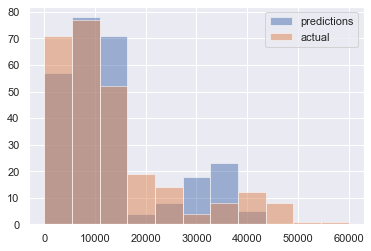

In [30]:
y_pred = train_bmi6.predict(X_test)
y_test = X_test['charges']
bins = np.linspace(0, 60000, 12)
plt.hist(y_pred, bins, label = 'predictions', alpha = 0.5)
plt.hist(y_test, bins, label = 'actual', alpha = 0.5)
plt.legend(loc='upper right')
plt.show()

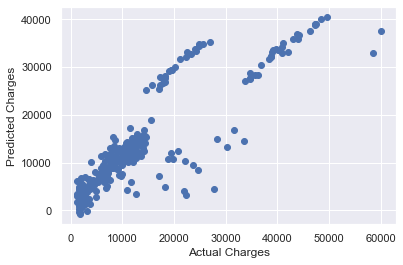

In [31]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

In [32]:
pred_describe = pd.DataFrame(y_pred)
pred_describe.describe().apply(lambda x: x.apply('{0:.5f}'.format))

,0
count,268.00000
mean,13365.99378
std,10429.50936
min,-849.10432
25%,5955.86294
50%,10747.55145
75%,14981.31753
max,40545.91768


In [33]:
act_describe = pd.DataFrame(y_test)
act_describe.describe().apply(lambda x: x.apply('{0:.5f}'.format))

,charges
count,268.00000
mean,13431.16457
std,12240.90451
min,1136.39940
25%,4905.71149
50%,9910.59670
75%,17092.91652
max,60021.39897


The initial model I built is a simple linear regression model using the predictor with the highest correlation, _smoker_. The model did not perform particularly well, it had an adjusted R2 of 0.621. 

Due to the low adjusted R2, I was curious to see what the other predictors would yield had I used them in a simple model. The results are not particularly confident - inducing, so I concluded that the relationship between the predictors and the target variable cannot be predicted using simple linear regression. 

Next I tried polynomial regression using the _smoker_no_ variable. This had little to no effect on the adjusted R2. This is due to the values being binary. Instead I tried again with the _age_ predictor. The adjusted R2 is still pretty low, but it trends higher as I increase the complexity. At n = 18, I had an adjusted R2 of 0.09299.

It’s clear at this point that a single predictor will be insufficient to build a good model. Next I used Multi-Linear Regression which resulted in an adjusted R2 of 0.746. Now it looks like I am on the right track. 

To further refine my multi-linear regression model, I used forward step-wise refinement. Ultimately landing on 6 predictors and a final adjusted R2 of 0.74622. 

I used my final model to predict the charges of the test dataset.  I overlayed that in a histogram with the actual charges. You’ll see that it is following a similar distribution, but it’s not completely the same. The data is also shown in a scatter plot. A more accurate model would show the data in a relatively straight line with a slope of 1. 

### Discussion and Conclusion
Linear regression is not the best model to use to predict the insurance charges from the dataset I used. 
I believe there are two primary reasons for this. The dataset was not very extensive. Medical diagnosis and treatments are extremely complex and vary greatly in cost. The limited attributes I had here does not wholly represent a policyholder's health. I also do not believe that linear regression is sufficent to identify the complex relationships in a person's attributes to their healthcare. 
To improve my project, I would want to use a different dataset, preferably one with far more atrributes. I'd like to include specific diagnoses (eg. heart disease, cancers, auto-immune disorders) as I believe those would more accurately represent the healthcare someone is receiving. Secondly, I would choose a different machine learning techinique. Random forest would be chosen due to its efficacy with similarly complex datasets. 